a. Cargamos librerías necesarias para el análisis

In [4]:
import pandas as pd # manipulación y análisis de datos
import matplotlib.pyplot as plt # creación de gráficos y visualizaciones
import seaborn as sns # visualizaciones más atractivas y complejas basadas en matplotlib
from sklearn.preprocessing import StandardScaler # normalizar las características (escalarlas a la misma escala)
from sklearn.model_selection import train_test_split # dividir el conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.linear_model import LogisticRegression # usar el modelo de regresión logística
from sklearn.metrics import accuracy_score # evaluar la precisión del modelo
from sklearn.svm import SVC # clasificador de máquinas de soporte (SVM)
from xgboost import XGBClassifier # eficiente para tareas de clasificación

b. Carga de datos

In [5]:
# Cargar archivos CSV
csv_train = pd.read_csv("cs-training.csv")
csv_test = pd.read_csv("cs-test.csv")

# Mostrar primeras filas
print(csv_train.head(4))
print(csv_test.head(4))

   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3          

**ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

a. Cambiamos nombres de los campos

In [6]:
#PRUEBA
csv_test = csv_test.rename(columns={
    "Unnamed: 0": "ID",
    "SeriousDlqin2yrs": "atraso_mayor_90_dias_grave",
    "RevolvingUtilizationOfUnsecuredLines": "porcent_saldo_tarj_cred",
    "age": "edad",
    "NumberOfTime30-59DaysPastDueNotWorse": "num_atraso_30_59_dias_bajo",
    "DebtRatio": "porcent_deuda_ingresos",
    "MonthlyIncome": "ingreso_mensual",
    "NumberOfOpenCreditLinesAndLoans": "num_creditos_abiertos",
    "NumberOfTimes90DaysLate": "num_atraso_mayor_90_dias_grave",
    "NumberRealEstateLoansOrLines": "num_creditos_hipotecarios",
    "NumberOfTime60-89DaysPastDueNotWorse": "num_atraso_60_89_dias_media",
    "NumberOfDependents": "num_familiares"
})
# Verificar los nuevos nombres de las columnas
csv_test.columns

Index(['ID', 'atraso_mayor_90_dias_grave', 'porcent_saldo_tarj_cred', 'edad',
       'num_atraso_30_59_dias_bajo', 'porcent_deuda_ingresos',
       'ingreso_mensual', 'num_creditos_abiertos',
       'num_atraso_mayor_90_dias_grave', 'num_creditos_hipotecarios',
       'num_atraso_60_89_dias_media', 'num_familiares'],
      dtype='object')

In [7]:
#ENTRENAMIENTO
csv_train = csv_train.rename(columns={
    "Unnamed: 0": "ID",
    "SeriousDlqin2yrs": "atraso_mayor_90_dias_grave",
    "RevolvingUtilizationOfUnsecuredLines": "porcent_saldo_tarj_cred",
    "age": "edad",
    "NumberOfTime30-59DaysPastDueNotWorse": "num_atraso_30_59_dias_bajo",
    "DebtRatio": "porcent_deuda_ingresos",
    "MonthlyIncome": "ingreso_mensual",
    "NumberOfOpenCreditLinesAndLoans": "num_creditos_abiertos",
    "NumberOfTimes90DaysLate": "num_atraso_mayor_90_dias_grave",
    "NumberRealEstateLoansOrLines": "num_creditos_hipotecarios",
    "NumberOfTime60-89DaysPastDueNotWorse": "num_atraso_60_89_dias_media",
    "NumberOfDependents": "num_familiares"
})
# Verificar los nuevos nombres de las columnas
csv_train.columns

Index(['ID', 'atraso_mayor_90_dias_grave', 'porcent_saldo_tarj_cred', 'edad',
       'num_atraso_30_59_dias_bajo', 'porcent_deuda_ingresos',
       'ingreso_mensual', 'num_creditos_abiertos',
       'num_atraso_mayor_90_dias_grave', 'num_creditos_hipotecarios',
       'num_atraso_60_89_dias_media', 'num_familiares'],
      dtype='object')

b. Estadística de los registros

In [8]:
# Estadísticas descriptivas del conjunto de entrenamiento para detectar atípicos
csv_train.describe()

,ID,atraso_mayor_90_dias_grave,porcent_saldo_tarj_cred,edad,num_atraso_30_59_dias_bajo,porcent_deuda_ingresos,ingreso_mensual,num_creditos_abiertos,num_atraso_mayor_90_dias_grave,num_creditos_hipotecarios,num_atraso_60_89_dias_media,num_familiares
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [9]:
# Revisar valores nulos
csv_train.isnull().sum()

ID                                    0
atraso_mayor_90_dias_grave            0
porcent_saldo_tarj_cred               0
edad                                  0
num_atraso_30_59_dias_bajo            0
porcent_deuda_ingresos                0
ingreso_mensual                   29731
num_creditos_abiertos                 0
num_atraso_mayor_90_dias_grave        0
num_creditos_hipotecarios             0
num_atraso_60_89_dias_media           0
num_familiares                     3924
dtype: int64

c. Detectamos valores no congruentes

In [10]:
#Revisamos datos atípicos
ingreso_mensual_atp = csv_train[csv_train['ingreso_mensual'] > 20000]  # Ingresos mayores 20k USD

edad_atp = csv_train[csv_train['edad'] < 20]  # Edades menor a 20 años

porcent_saldo_tarj_cred_atp = csv_train[csv_train['porcent_saldo_tarj_cred'] > 1] # Porcentajes mayor a 100%

porcent_deuda_ingresos_atp = csv_train[csv_train['porcent_deuda_ingresos'] > 1] # Porcentajes mayor a 100%

# Mostrar cantidad de valores atípicos
print(f"*Campo ingreso_mensual mayor a 20k USD:* {len(ingreso_mensual_atp['ingreso_mensual'].head())} datos atípicos")

print(f"*Campo edad menor a 20 años:* {len(edad_atp['edad'].head())} datos atípicos")

print(f"*Campo porcent_saldo_tarj_cred mayor 100%:* {len(porcent_saldo_tarj_cred_atp['porcent_saldo_tarj_cred'].head())} datos atípicos")

print(f"*Campo porcent_deuda_ingresos mayor 100%:* {len(porcent_deuda_ingresos_atp['porcent_deuda_ingresos'].head())} datos atípicos")

*Campo ingreso_mensual mayor a 20k USD:* 5 datos atípicos
*Campo edad menor a 20 años:* 1 datos atípicos
*Campo porcent_saldo_tarj_cred mayor 100%:* 5 datos atípicos
*Campo porcent_deuda_ingresos mayor 100%:* 5 datos atípicos


**LIMPEZA DE DATOS**

a. Segregación y tratamiento de registros en blanco

In [11]:
csv_train['num_familiares'] = csv_train['num_familiares'].fillna(csv_train['num_familiares'].mean())
csv_train['ingreso_mensual'] = csv_train['ingreso_mensual'].fillna(csv_train['ingreso_mensual'].mean())

# Filtramos el dataset segregando datos atípicos
training_filtrado = csv_train[
                                (csv_train['edad'] > 20) & 
                                (csv_train['ingreso_mensual'] < 20000) & 
                                (csv_train['porcent_saldo_tarj_cred'] < 1) & 
                                (csv_train['porcent_deuda_ingresos'] < 1)
                              ]

#Eliminamos campo ID

training_filtrado = training_filtrado.drop(columns=['ID'])

In [12]:
# Mostrar la estadisticas por campos limpios
training_filtrado.describe()

,atraso_mayor_90_dias_grave,porcent_saldo_tarj_cred,edad,num_atraso_30_59_dias_bajo,porcent_deuda_ingresos,ingreso_mensual,num_creditos_abiertos,num_atraso_mayor_90_dias_grave,num_creditos_hipotecarios,num_atraso_60_89_dias_media,num_familiares
count,109737.000000,109737.000000,109737.000000,109737.000000,109737.000000,109737.000000,109737.000000,109737.000000,109737.000000,109737.000000,109737.000000
mean,0.060681,0.313740,51.585646,0.449347,0.303213,6293.187957,8.565589,0.293165,0.985730,0.271823,0.831868
std,0.238746,0.338793,14.662620,4.614088,0.224748,3556.802019,5.119287,4.593273,1.033483,4.583338,1.134667
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.031424,41.000000,0.000000,0.127343,3655.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.161319,51.000000,0.000000,0.276477,5600.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.539586,62.000000,0.000000,0.439006,8200.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.000000,103.000000,98.000000,0.999909,19989.000000,57.000000,98.000000,20.000000,98.000000,20.000000


b. Revisión de valores en blanco

In [13]:
training_filtrado.isnull().sum()

atraso_mayor_90_dias_grave        0
porcent_saldo_tarj_cred           0
edad                              0
num_atraso_30_59_dias_bajo        0
porcent_deuda_ingresos            0
ingreso_mensual                   0
num_creditos_abiertos             0
num_atraso_mayor_90_dias_grave    0
num_creditos_hipotecarios         0
num_atraso_60_89_dias_media       0
num_familiares                    0
dtype: int64

**VISUALIZACIÓN DE DATOS**

a. Histogramas

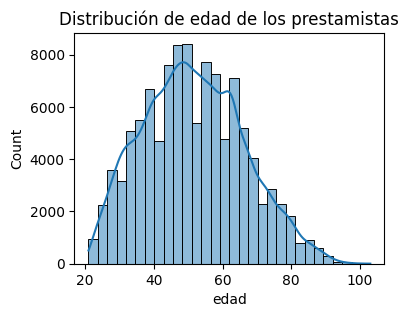

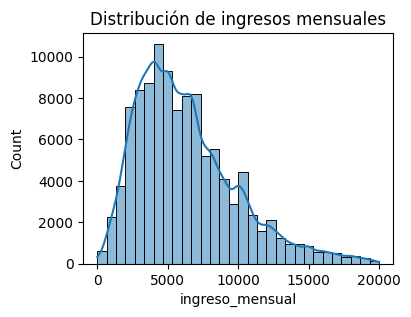

In [14]:
# Histograma de la edad
plt.figure(figsize=(4,3))
sns.histplot(training_filtrado['edad'], kde=True, bins=30)
plt.title('Distribución de edad de los prestamistas')
plt.show()

# Histograma de Ingresos Mensuales
plt.figure(figsize=(4,3))
sns.histplot(training_filtrado['ingreso_mensual'].dropna(), kde=True, bins=30)
plt.title('Distribución de ingresos mensuales')
plt.show()

b. Identificación de clientes en un estado grave: retrasos en pagos mayor a 90 días

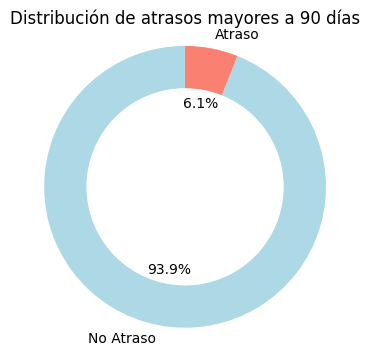

In [15]:
# Contar la cantidad de 0s y 1s
counts = training_filtrado['atraso_mayor_90_dias_grave'].value_counts()

# Definir el gráfico de anillo
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=['No Atraso', 'Atraso'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
center_circle = plt.Circle((0, 0), 0.70, fc='white')  # Crear el círculo central
fig = plt.gcf()
fig.gca().add_artist(center_circle)  # Añadir el círculo central

# Títulos y formato
plt.title('Distribución de atrasos mayores a 90 días')
plt.axis('equal')  # Asegurar que el gráfico sea circular
plt.show()

c. Correlación entre variables

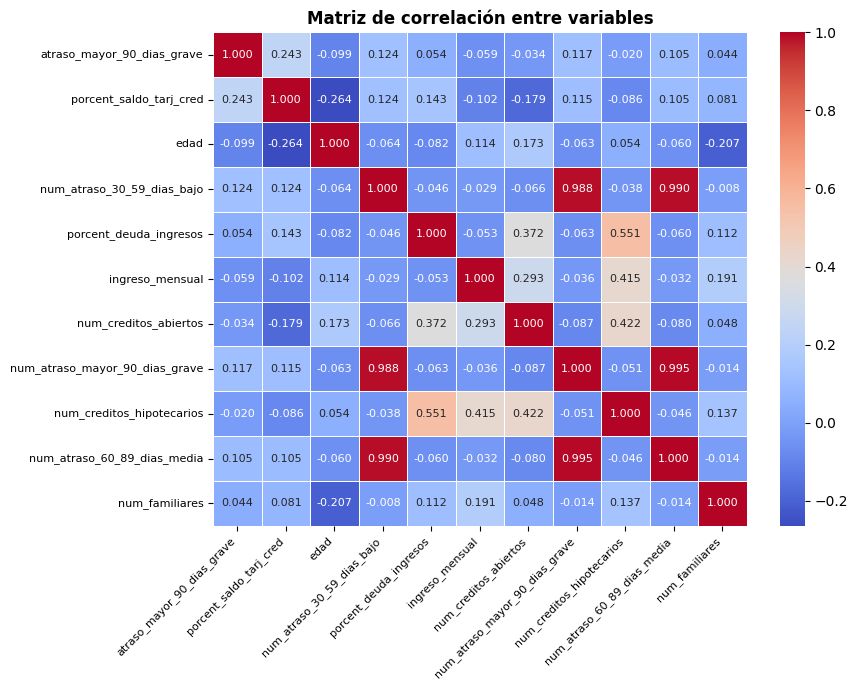

In [16]:
# Matriz de correlación
plt.figure(figsize=(9,7))
correlation_matrix = training_filtrado.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt=".3f")

# Ajustar el tamaño de las etiquetas en los ejes
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # Reduce la fuente y ajusta la rotación de los nombres en el eje x
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=8)  # Reduce la fuente de los nombres en el eje y

plt.title('Matriz de correlación entre variables', fontweight='bold')
plt.tight_layout()
plt.show()

**ESCALADO DE DATOS**

In [17]:
# Seleccionar las columnas numéricas para escalar
cols_to_scale = ['ingreso_mensual', 'porcent_saldo_tarj_cred', 'porcent_deuda_ingresos', 'num_familiares', 'edad']

# Crear el escalador
scaler = StandardScaler()

# Escalar las columnas seleccionadas
training_filtrado[cols_to_scale] = scaler.fit_transform(training_filtrado[cols_to_scale])
# Definir las características (X) y la variable objetivo (y)
X = training_filtrado.drop(columns=['atraso_mayor_90_dias_grave'])  # Excluir la variable objetivo
y = training_filtrado['atraso_mayor_90_dias_grave']  # 'resultado_crediticio' sería la variable que indica si un cliente es "bueno" o "malo" para el crédito

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**ENTRENAMIENTO Y EVALUACIÓN DE MODELOS**

Regresión Logística

In [18]:
# Entrenar el modelo
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_logreg = logreg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy Regresión Logística: {accuracy_logreg:.4f}')

Accuracy Regresión Logística: 0.9389


Support Vector Machine

In [19]:
# Entrenar el modelo
svm = SVC()
svm.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_svm = svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy SVM: {accuracy_svm:.4f}')

Accuracy SVM: 0.9393


XGBoost

In [20]:
# Entrenar el modelo
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_xgb = xgb.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy XGBoost: {accuracy_xgb:.4f}')

Accuracy XGBoost: 0.9395


c:\Users\angel.chiriguaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:56:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**RESULTADOS**

Resultados de los algoritmos ML

In [21]:
# Imprimir las accuracies de los modelos
print(f"Accuracy de los Modelos:")
print(f"Regresión Logística: {accuracy_logreg:.4f}")
print(f"SVM: {accuracy_svm:.4f}")
print(f"XGBoost: {accuracy_xgb:.4f}")
# Resultados de las accuracies
modelos = ['Regresión Logística', 'SVM', 'XGBoost']
accuracies = [accuracy_logreg, accuracy_svm, accuracy_xgb]

Accuracy de los Modelos:
Regresión Logística: 0.9389
SVM: 0.9393
XGBoost: 0.9395


Visualización algoritmo con mayor precisión

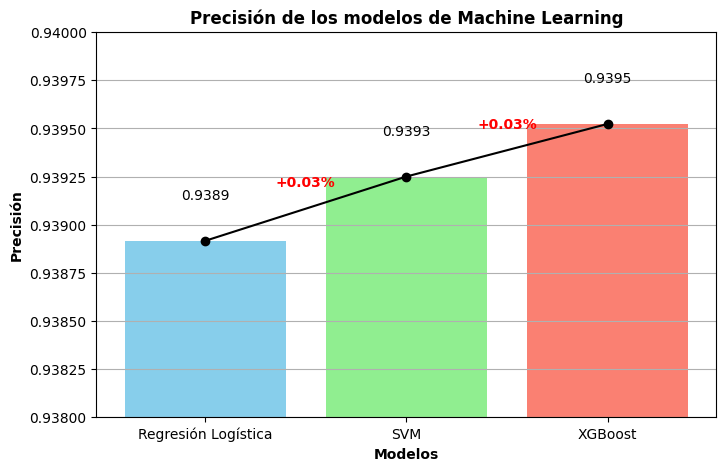

In [22]:
# Calcular el acumulado para el gráfico de cascada
values = [accuracies[0]]
for i in range(1, len(accuracies)):
    values.append(values[-1] + (accuracies[i] - accuracies[i-1]))

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(modelos, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.plot(modelos, values, marker='o', color='black')  # Línea de referencia acumulada
plt.ylim(0.938, 0.94)  # Limitar el eje y entre 0.938 y 0.94 para mejor visualización
plt.title('Precisión de los modelos de Machine Learning', fontweight='bold')
plt.xlabel('Modelos', fontweight='bold')
plt.ylabel('Precisión', fontweight='bold')
plt.grid(axis='y')

# Añadir los valores de accuracy encima de las barras
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.0002, f'{acc:.4f}', ha='center', va='bottom')

# Añadir las diferencias entre las barras en porcentaje y en color rojo, desplazadas hacia arriba
for i in range(1, len(accuracies)):
    diferencia = (accuracies[i] - accuracies[i - 1]) * 100  # Convertir a porcentaje
    y_position = (accuracies[i] + accuracies[i - 1]) / 2 + 0.0001  # Incrementar la posición vertical
    plt.text(i - 0.5, y_position, f'+{diferencia:.2f}%', 
             ha='center', va='bottom', fontweight='bold', color='red')

plt.show()
